# Fake News Detection using LSTM and Deep learning 

In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install nltk
!pip install wordcloud


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import wordcloud as WordCloud
import re

# Exploring fake news

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [4]:
fake = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')


In [5]:
fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [7]:
fake['subject'].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

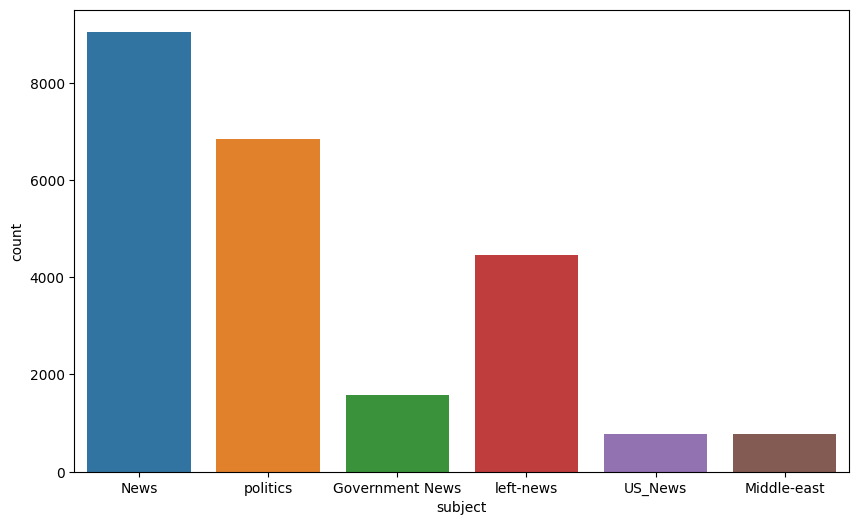

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject', data=fake)
  # Rotate the x-axis labels for better readability if needed
plt.show()

# Wordcloud

In [9]:
text=''.join(fake['text'].tolist())

In [10]:
' '.join(['this', 'is', 'a','data'])

'this is a data'

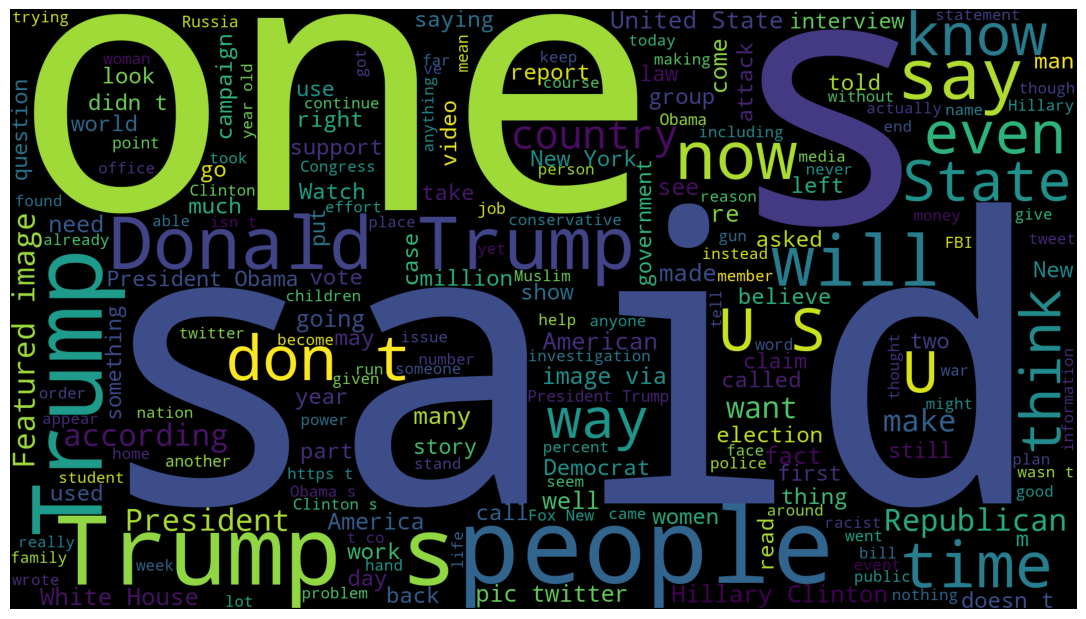

In [11]:
import wordcloud
import matplotlib.pyplot as plt


wordcloud = wordcloud.WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(12, 6))

plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


# Exploring real news

In [13]:
real = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')

In [14]:
text=''.join(real['text'].tolist())

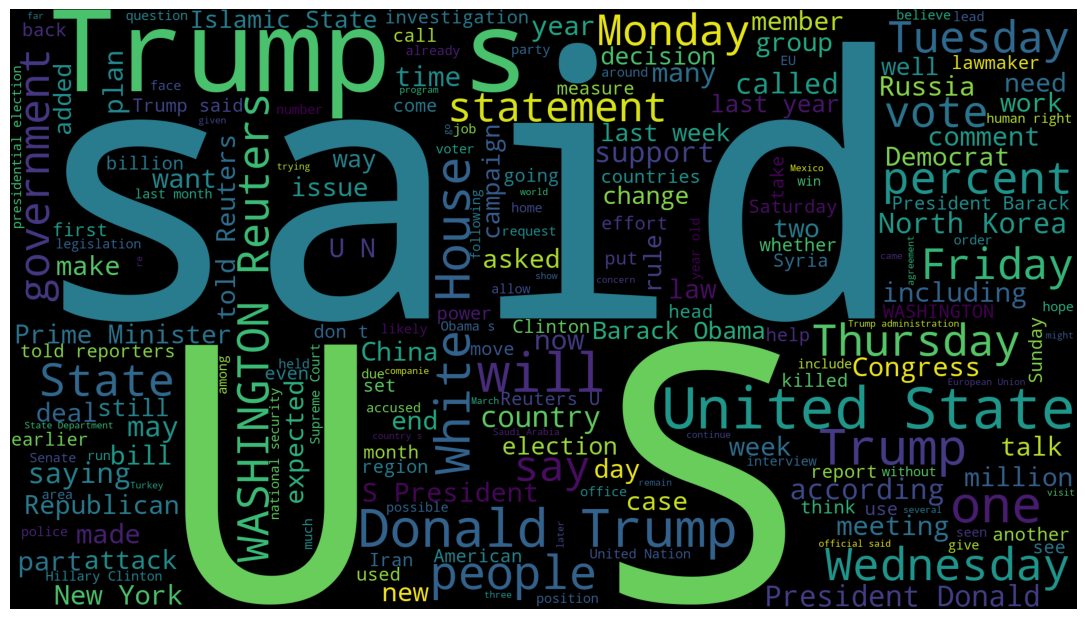

In [15]:
import wordcloud
import matplotlib.pyplot as plt


wordcloud = wordcloud.WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(12, 6))

plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [16]:
real.sample(5)

,title,text,subject,date
19969,Putin and Macron discuss North Korea's missile...,MOSCOW (Reuters) - Russian President Vladimir ...,worldnews,"September 15, 2017"
3010,"Trump urges India's Modi to fix deficit, but s...",WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"June 26, 2017"
20024,South Korea condemns North Korea missile launc...,SEOUL (Reuters) - South Korea s foreign minist...,worldnews,"September 15, 2017"
17761,"Turkish, U.S. foreign ministers speak by phone...",ANKARA (Reuters) - Turkey s Foreign Minister M...,worldnews,"October 11, 2017"
19806,Biafra separatists sponsored by Nigerian gover...,ABUJA (Reuters) - A Nigerian minister accused ...,worldnews,"September 18, 2017"


In [17]:
from numpy import record
unknown_publishers = []
for index, row in  enumerate(real.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]
    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [18]:
len(unknown_publishers)

222

In [19]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [20]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [21]:
real= real.drop(8970, axis=0)

In [22]:
from pandas.core.common import temp_setattr

publisher = []
tmp_text = []

for index, row in enumerate(real.text.values):
    if index in unknown_publishers:
        tmp_text.append(row)
        publisher.append('Unknown')
    else:
        record = row.split('-', maxsplit=1)
        publisher.append(record[0].strip())
        tmp_text.append(record[1].strip())


In [23]:
real['publisher']=publisher
real['text'] = tmp_text

In [24]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [25]:
real.shape

(21416, 5)

In [26]:
empty_fake_index = [index for index, text in enumerate(fake.text.tolist()) if str(text).strip()==""]


In [27]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [28]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

In [29]:
real['text']= real['text'].apply(lambda x:str(x).lower())
fake['text']=fake['text'].apply(lambda x:str(x).lower())

# Preprocessing the text

In [30]:
real['class']=1
fake['class']=0

In [31]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [32]:
real= real[['text', 'class']]

In [33]:
fake= fake[['text', 'class']]

In [34]:

#  we have 'real' and 'fake' DataFrames
data = pd.concat([real, fake], ignore_index=True)


In [35]:
data.sample(5)

,text,class
37736,beggin’ megyn kelly’s new book ripped to shrea...,0
42995,15 yr olds in this state can now get state fun...,0
36287,the american energy success story obama won’t ...,0
11741,british pm may forces her deputy to resign ove...,1
24084,hamilton cast added ‘sisterhood’ to ‘america ...,0


In [36]:
# https://github.com/laxmimerit/preprocess_kgptalkie

In [37]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
!pip install spacy
!python -m spacy download en_core_web_sm


  Using cached spacy-2.2.3.tar.gz (5.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [60 lines of output]
      Traceback (most recent call last):
        File "C:\Users\Dell\AppData\Local\Temp\pip-build-env-g9bdgjpd\overlay\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\Dell\AppData\Local\Temp\pip-build-env-g9bdgjpd\overlay\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\Dell\AppData\Local\Temp\pip-build-env-g9bdgjpd\overlay\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _par

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB 5.9 MB/s eta 0:00:03
     -- ------------------------------------- 0.8/12.8 MB 8.2 MB/s eta 0:00:02
     ---- ----------------------------------- 1.4/12.8 MB 9.5 MB/s eta 0:00:02
     ----- ---------------------------------- 1.9/12.8 MB 9.8 MB/s eta 0:00:02
     ------- -------------------------------- 2.4/12.8 MB 10.1 MB/s eta 0:00:02
     --------- ------------------------------ 2.9/12.8 MB 10.3 MB/s eta 0:00:01
     ---------- ----------------------------- 3.4/12.8 MB 10.5 MB/s eta 0:00:01
     ------------ --------------------------- 4.0/12.8 MB 10.5 MB/s eta 0:00:01
     -------------- ------------------------- 4.5/12.8 MB 10.7 MB/s eta 0:00:01
     --------------- ------------------------ 5.1/12.8 MB 10.8 MB/s eta 0:00:01
     ----------------- ---------------------- 5.5/12.8 MB 10.7 MB/s eta 0:00:01
     ------------------ --------------------- 5.9/12

  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\Dell\AppData\Local\Temp\pip-req-build-zrqyxyut'


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB 6.5 MB/s eta 0:00:02
     -- ------------------------------------- 0.7/12.8 MB 7.0 MB/s eta 0:00:02
     --- ------------------------------------ 1.0/12.8 MB 6.9 MB/s eta 0:00:02
     ---- ----------------------------------- 1.3/12.8 MB 6.9 MB/s eta 0:00:02
     ----- ---------------------------------- 1.6/12.8 MB 6.8 MB/s eta 0:00:02
     ------ --------------------------------- 1.9/12.8 MB 6.9 MB/s eta 0:00:02
     ------- -------------------------------- 2.2/12.8 MB 6.8 MB/s eta 0:00:02
     ------- -------------------------------- 2.4/12.8 MB 6.5 MB/s eta 0:00:02
     --------- ------------------------------ 2.9/12.8 MB 6.8 MB/s eta 0:00:02
     ---------- ----------------------------- 3.3/12.8 MB 7.0 MB/s eta 0:00:02
     ----------- ---------------------------- 3.7/12.8 MB 7.2 MB/s eta 0:00:02
     ------------- -------------------------- 4.2/12.8 MB 7

In [38]:
import preprocess_kgptalkie as ps

data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))


In [39]:
ps.remove_special_chars('this ,. @ # is gre@t')

'this is gret'

# Vectoriztion
### convert text data into numeric data


In [40]:
!pip install gensim
import gensim


In [41]:
y = data['class'].values


In [42]:
X=[d.split() for d in data['text'].tolist()]

In [43]:
type(X[0])

list

In [44]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [45]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1)


In [46]:
# Get the number of unique words in the vocabulary
num_unique_words = len(w2v_model.wv.index_to_key)
print(num_unique_words)

231872


In [47]:
w2v_model.wv['india']


array([-1.9926927 , -0.61939234, -0.865201  ,  2.218447  ,  0.46072274,
       -0.99696344,  0.71834576,  1.9364959 , -1.1838824 ,  2.3040135 ,
        1.1005104 ,  1.3082843 , -2.4051127 , -0.5541345 ,  2.1632605 ,
        1.8333383 ,  1.8438723 ,  1.6989405 , -1.8604907 , -2.7515976 ,
        2.1207283 ,  1.423713  , -1.497079  ,  1.288744  ,  0.7382523 ,
        0.14129214,  0.3272171 ,  0.06819492, -0.9308102 ,  1.6851249 ,
        4.5834985 , -0.05644829, -0.20244822,  1.3471401 ,  1.496741  ,
        1.3345432 , -1.3546582 ,  0.39150017,  1.8159628 ,  0.5639296 ,
        1.8186877 , -3.750962  ,  1.3549541 ,  0.7792341 ,  1.0583141 ,
       -0.3918492 , -0.07291095,  2.2928348 , -0.960576  , -0.93488985,
       -0.9845522 ,  0.6253304 ,  2.156677  , -0.3874658 ,  1.7059511 ,
       -2.1206975 ,  2.2942812 ,  3.0289037 , -0.12707706, -3.088719  ,
        1.727313  ,  0.42470017, -1.9112856 ,  0.59979975,  0.7810641 ,
        0.7079447 , -2.3380551 , -0.73430574,  1.6906832 , -0.78

In [48]:
w2v_model.wv.most_similar('india')


[('pakistan', 0.7464126348495483),
 ('malaysia', 0.6797102689743042),
 ('indias', 0.6504877805709839),
 ('indian', 0.6501542925834656),
 ('china', 0.6339668035507202),
 ('beijings', 0.6251298785209656),
 ('islamabad', 0.6043774485588074),
 ('narendra', 0.6020591259002686),
 ('modi', 0.6015248894691467),
 ('chinas', 0.5932376384735107)]

# Train the Machine learing  model
1 direct use vector
2  we can feed these vector as a initial weight in ml model 
then ml will recreate these vectors

In [49]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)


In [50]:
X = tokenizer.texts_to_sequences(X)


In [51]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

## Anayze the text data

In [52]:
[len(x) for x in X]

[753,
 628,
 464,
 382,
 860,
 599,
 543,
 137,
 101,
 74,
 404,
 623,
 102,
 186,
 359,
 450,
 696,
 179,
 394,
 218,
 527,
 910,
 415,
 364,
 693,
 375,
 350,
 268,
 75,
 434,
 177,
 228,
 95,
 337,
 1110,
 839,
 554,
 469,
 466,
 99,
 178,
 324,
 582,
 72,
 409,
 365,
 617,
 358,
 85,
 403,
 81,
 962,
 656,
 418,
 399,
 384,
 220,
 162,
 389,
 616,
 489,
 244,
 849,
 370,
 628,
 649,
 1300,
 430,
 398,
 142,
 212,
 1108,
 75,
 74,
 588,
 850,
 758,
 788,
 347,
 694,
 482,
 416,
 84,
 419,
 127,
 1383,
 100,
 458,
 358,
 85,
 62,
 108,
 656,
 349,
 228,
 80,
 322,
 427,
 347,
 561,
 415,
 854,
 92,
 333,
 136,
 198,
 408,
 91,
 1124,
 995,
 386,
 115,
 73,
 437,
 598,
 88,
 80,
 638,
 252,
 254,
 313,
 202,
 161,
 292,
 392,
 428,
 401,
 717,
 618,
 282,
 104,
 87,
 85,
 79,
 74,
 509,
 407,
 249,
 723,
 767,
 231,
 420,
 433,
 545,
 420,
 365,
 310,
 831,
 686,
 89,
 99,
 108,
 360,
 87,
 58,
 294,
 225,
 285,
 370,
 108,
 462,
 580,
 943,
 1067,
 263,
 462,
 464,
 499,
 89,
 534,
 

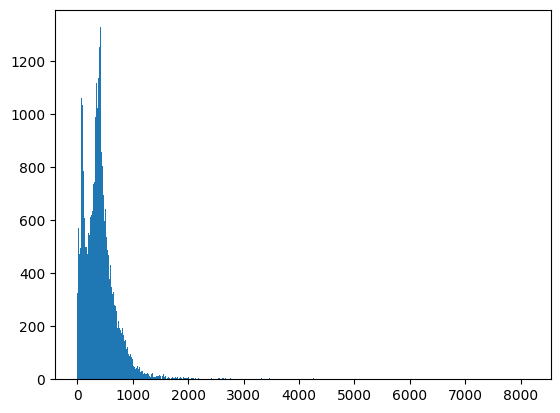

In [53]:
plt.hist([len(x) for x in X], bins=700)
plt.show()

In [54]:
import numpy as np
sequence_lengths = np.array([len(x) for x in X])

# Count the number of sequences with length > 1000
count_greater_than_1000 = len(sequence_lengths[sequence_lengths > 1000])

# Print the count
count_greater_than_1000

1581

In [55]:
maxlen = 1000  # Define the maximum length you want

# Pad sequences to the defined maximum length
x = pad_sequences(X, maxlen=maxlen)


In [56]:
len(X[101])

854

In [57]:
num_unique_words = len(tokenizer.word_index)
word_index_dict = tokenizer.word_index


In [58]:
import numpy as np

def get_weight_matrix(model, word_index, num_unique_words, embedding_dim):
    weight_matrix = np.zeros((num_unique_words, embedding_dim))
    for word, i in word_index.items():
        if i < num_unique_words:
            try:
                weight_matrix[i] = model.wv[word]
            except KeyError:
                # Word not found in the Word2Vec model, you can handle this case as needed
                pass
    return weight_matrix


In [59]:
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index, num_unique_words, DIM)


In [60]:
embedding_vectors.shape

(231872, 100)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()

# Add an embedding layer with pre-trained Word2Vec embeddings
model.add(Embedding(input_dim=num_unique_words, output_dim=DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))

# Add an LSTM layer with 128 units
model.add(LSTM(units=128))

# Add a dense output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and binary cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23187200  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,304,577
Trainable params: 117,377
Non-trainable params: 23,187,200
_________________________________________________________________


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [64]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

In [ ]:
y_pred = (model.predict(X_test) >=0.5).astype(int)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

## Test the ML model

In [ ]:
X_test

In [ ]:
x= ['this is news']
x= tokenizer.texts_to_sequnses(x)
x=pad_sequences(x, maxlen=maxlen)


In [ ]:
(model.predict(x) >=0.5).astype(int)